In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | carutapera
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | petatlan
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | evensk
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | atar
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | oranjemund
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | kjopsvik
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | albany

Processing Record 38 of Set 4 | montepuez
Processing Record 39 of Set 4 | sorvag
City not found. Skipping...
Processing Record 40 of Set 4 | robertsport
Processing Record 41 of Set 4 | lingdong
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | manuk mangkaw
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | charters towers
Processing Record 46 of Set 4 | snezhnogorsk
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | arraial do cabo
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | marquette
Processing Record 1 of Set 5 | shimoda
Processing Record 2 of Set 5 | nanortalik
Processing Record 3 of Set 5 | nome
Processing Record 4 of Set 5 | lourdes
Processing Record 5 of Set 5 | sorland
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | opuwo
Processing Record 9 of Set 5 | bubaque
Processing Record 10 of Set 5 | neryungri
Processing Record

Processing Record 30 of Set 8 | takestan
Processing Record 31 of Set 8 | poum
Processing Record 32 of Set 8 | mackay
Processing Record 33 of Set 8 | maghama
City not found. Skipping...
Processing Record 34 of Set 8 | ngunguru
Processing Record 35 of Set 8 | lavumisa
Processing Record 36 of Set 8 | vila
Processing Record 37 of Set 8 | port-gentil
Processing Record 38 of Set 8 | nizwa
Processing Record 39 of Set 8 | chiredzi
Processing Record 40 of Set 8 | lata
Processing Record 41 of Set 8 | vihari
Processing Record 42 of Set 8 | grand baie
Processing Record 43 of Set 8 | kota kinabalu
Processing Record 44 of Set 8 | vilyuysk
Processing Record 45 of Set 8 | baoro
Processing Record 46 of Set 8 | te anau
Processing Record 47 of Set 8 | kanker
Processing Record 48 of Set 8 | ordzhonikidze
Processing Record 49 of Set 8 | moyale
Processing Record 50 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 1 of Set 9 | ulaanbaatar
Processing Record 2 of Set 9 | boende
Processing Reco

Processing Record 18 of Set 12 | idrinskoye
Processing Record 19 of Set 12 | vaitape
Processing Record 20 of Set 12 | cairns
Processing Record 21 of Set 12 | puro
Processing Record 22 of Set 12 | bilma
Processing Record 23 of Set 12 | codrington
Processing Record 24 of Set 12 | luanda
Processing Record 25 of Set 12 | nador
Processing Record 26 of Set 12 | swan hill
Processing Record 27 of Set 12 | shelburne
Processing Record 28 of Set 12 | kihei
Processing Record 29 of Set 12 | yerbogachen
Processing Record 30 of Set 12 | zabid
Processing Record 31 of Set 12 | mount gambier
Processing Record 32 of Set 12 | yumen
Processing Record 33 of Set 12 | tezu
Processing Record 34 of Set 12 | margate
Processing Record 35 of Set 12 | santa maria del oro
Processing Record 36 of Set 12 | belaya gora
Processing Record 37 of Set 12 | lucapa
Processing Record 38 of Set 12 | oppdal
Processing Record 39 of Set 12 | campiglia marittima
Processing Record 40 of Set 12 | vila franca do campo
Processing Recor

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,82.89,89,20,1.14,MY,2022-02-03 15:16:37
1,Chuy,-33.6971,-53.4616,87.12,51,24,4.92,UY,2022-02-03 15:18:29
2,Carutapera,-1.1950,-46.0200,82.40,80,99,7.29,BR,2022-02-03 15:18:29
3,New Norfolk,-42.7826,147.0587,51.71,64,3,1.99,AU,2022-02-03 15:18:29
4,Airai,-8.9266,125.4092,60.51,93,99,2.62,TL,2022-02-03 15:18:30
5,Hobart,-42.8794,147.3294,52.05,78,40,4.61,AU,2022-02-03 15:15:02
6,Petatlan,17.5167,-101.2667,73.20,38,0,1.90,MX,2022-02-03 15:18:30
7,Busselton,-33.6500,115.3333,73.04,42,95,8.55,AU,2022-02-03 15:18:31
8,Ushuaia,-54.8000,-68.3000,46.02,65,100,19.57,AR,2022-02-03 15:13:44
9,Evensk,61.9500,159.2333,17.62,42,72,26.04,RU,2022-02-03 15:18:31


In [9]:
new_column_order =["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [10]:
city_data_df=city_data_df[new_column_order]

In [11]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-02-03 15:16:37,5.4112,100.3354,82.89,89,20,1.14
1,Chuy,UY,2022-02-03 15:18:29,-33.6971,-53.4616,87.12,51,24,4.92
2,Carutapera,BR,2022-02-03 15:18:29,-1.1950,-46.0200,82.40,80,99,7.29
3,New Norfolk,AU,2022-02-03 15:18:29,-42.7826,147.0587,51.71,64,3,1.99
4,Airai,TL,2022-02-03 15:18:30,-8.9266,125.4092,60.51,93,99,2.62
...,...,...,...,...,...,...,...,...,...
596,Benjamin Constant,BR,2022-02-03 15:50:08,-4.3831,-70.0311,77.13,94,75,5.75
597,Becerril,CO,2022-02-03 15:50:09,9.7041,-73.2793,96.15,29,2,4.36
598,Kampot,KH,2022-02-03 15:50:09,10.6167,104.1833,75.25,74,71,7.43
599,Pishin,PK,2022-02-03 15:50:10,30.5803,66.9961,40.95,46,0,9.82


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

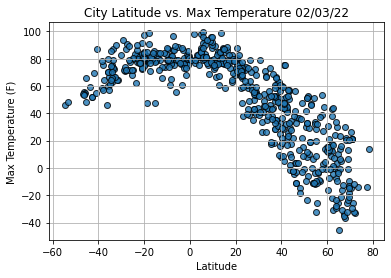

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

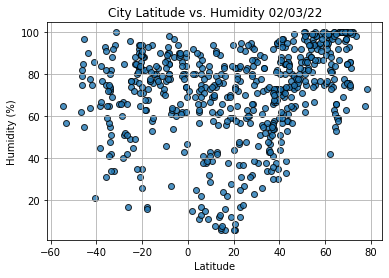

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

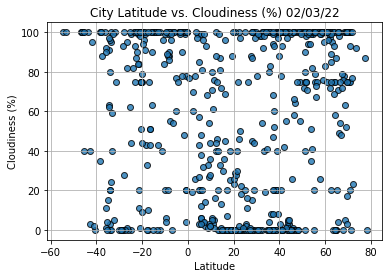

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

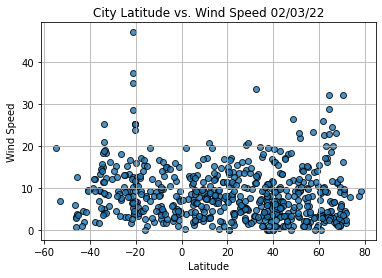

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
        

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-02-03 15:16:37,5.4112,100.3354,82.89,89,20,1.14
6,Petatlan,MX,2022-02-03 15:18:30,17.5167,-101.2667,73.20,38,0,1.90
9,Evensk,RU,2022-02-03 15:18:31,61.9500,159.2333,17.62,42,72,26.04
10,Butaritari,KI,2022-02-03 15:18:32,3.0707,172.7902,80.85,80,78,12.82
12,Atar,MR,2022-02-03 15:18:32,20.5169,-13.0499,87.69,6,0,13.27


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

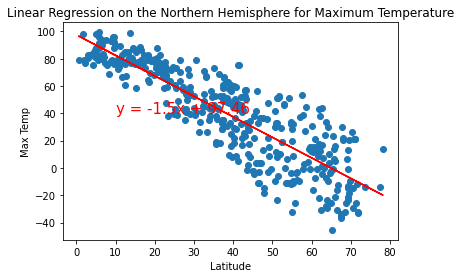

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

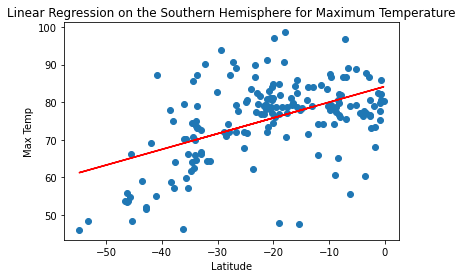

In [22]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

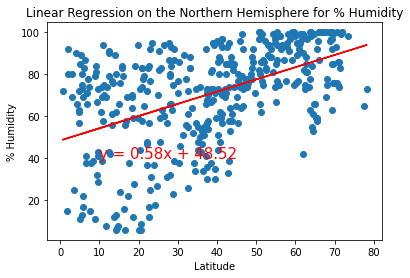

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(10,40))

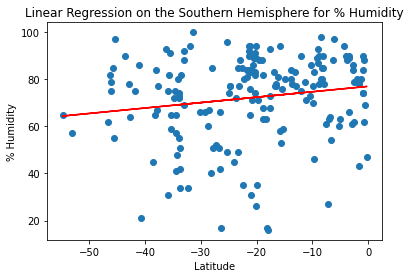

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(10,40))

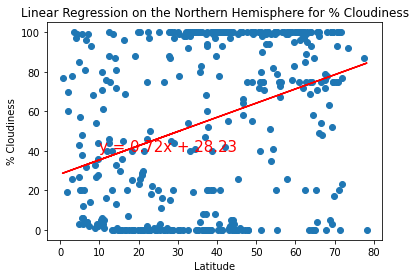

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,40))

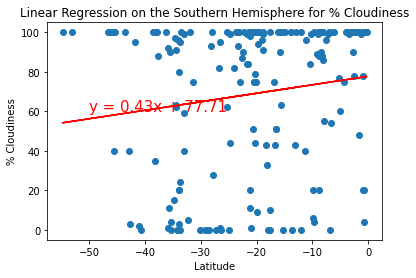

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

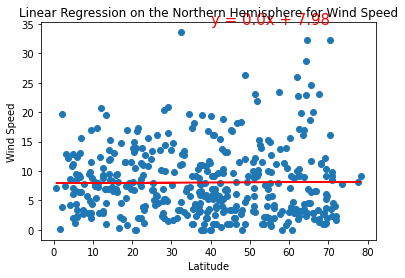

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

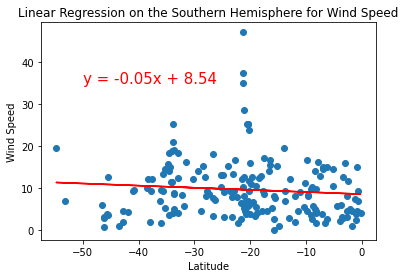

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))